<h1>ทำการ Import Library และทำการอ่านข้อมูลพร้อมทำ CSV Read</h1>

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
import stemgraphic
import seaborn as sns 
import scipy 
cols = ["province","num_acc","num_injuries"]
df = pd.read_csv("dataset.csv",encoding="utf-8",usecols=cols)

In [114]:
print(df)

          province  num_acc  num_injuries
0           Roi Et        1             2
1     Sakon Nakhon        1             1
2         Mukdahan        1             1
3      Surat Thani        3             5
4      Phitsanulok        1             2
...            ...      ...           ...
1053  Samut Prakan        2             1
1054    Udon Thani        1             0
1055           Tak        1             0
1056    Chiang Rai        1             0
1057   Phatthalung        1             0

[1058 rows x 3 columns]


<p>ทำการหา Mean, Median, Mode, Sample Standard deviation, Min, Max</p>

In [115]:
df.describe()
print("Mode\n",df.mode(numeric_only=True))
print("Variance\n", df.var(numeric_only=True))

Mode
    num_acc  num_injuries
0        1             1
Variance
 num_acc         0.560523
num_injuries    1.122609
dtype: float64


สร้าง Histogram จาก Dataframe

<function matplotlib.pyplot.show(close=None, block=None)>

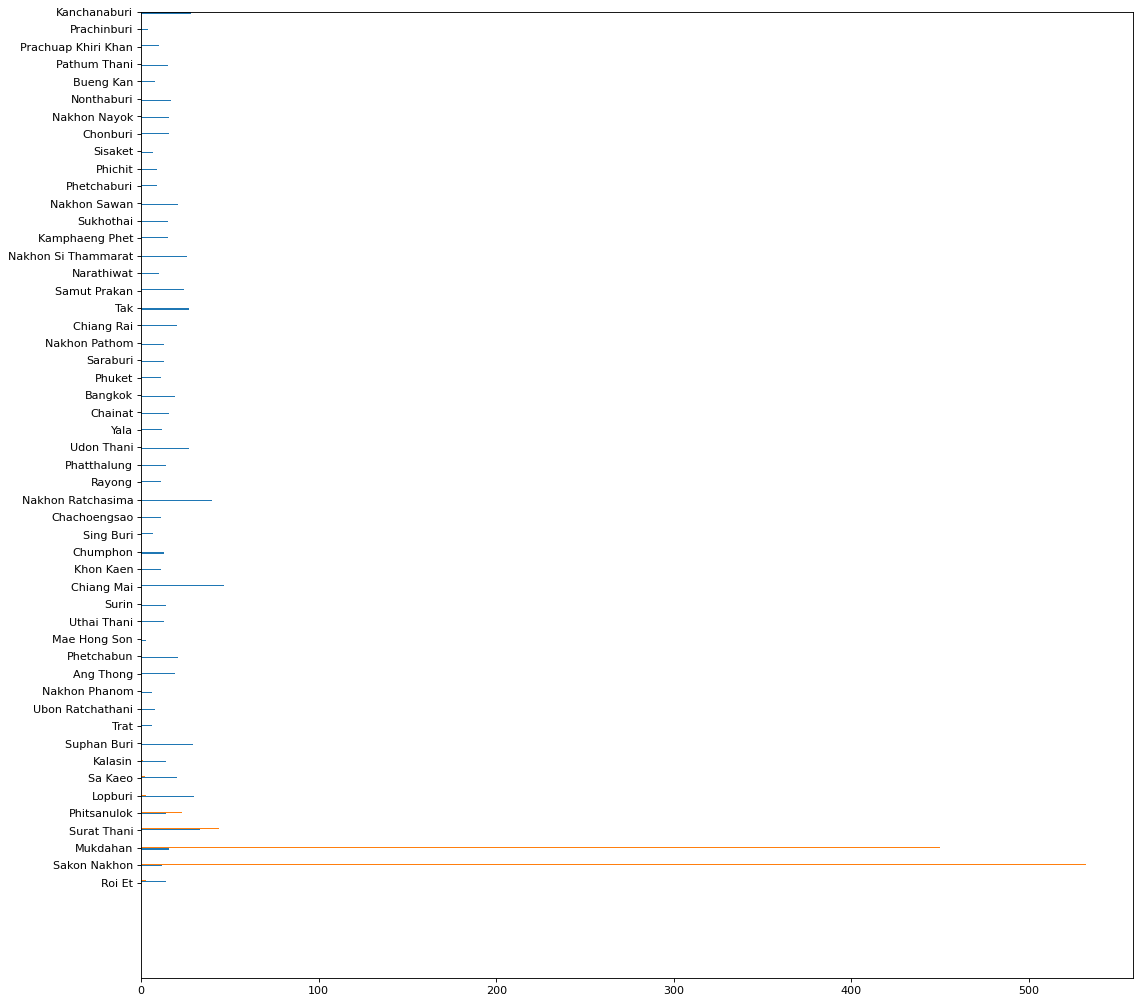

In [116]:
bins = np.linspace(0, 110.0, 700)
figure(figsize=(16, 16), dpi=80)
plt.hist(df[["province","num_acc"]], bins, orientation='horizontal')
plt.ylim((None, 50))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

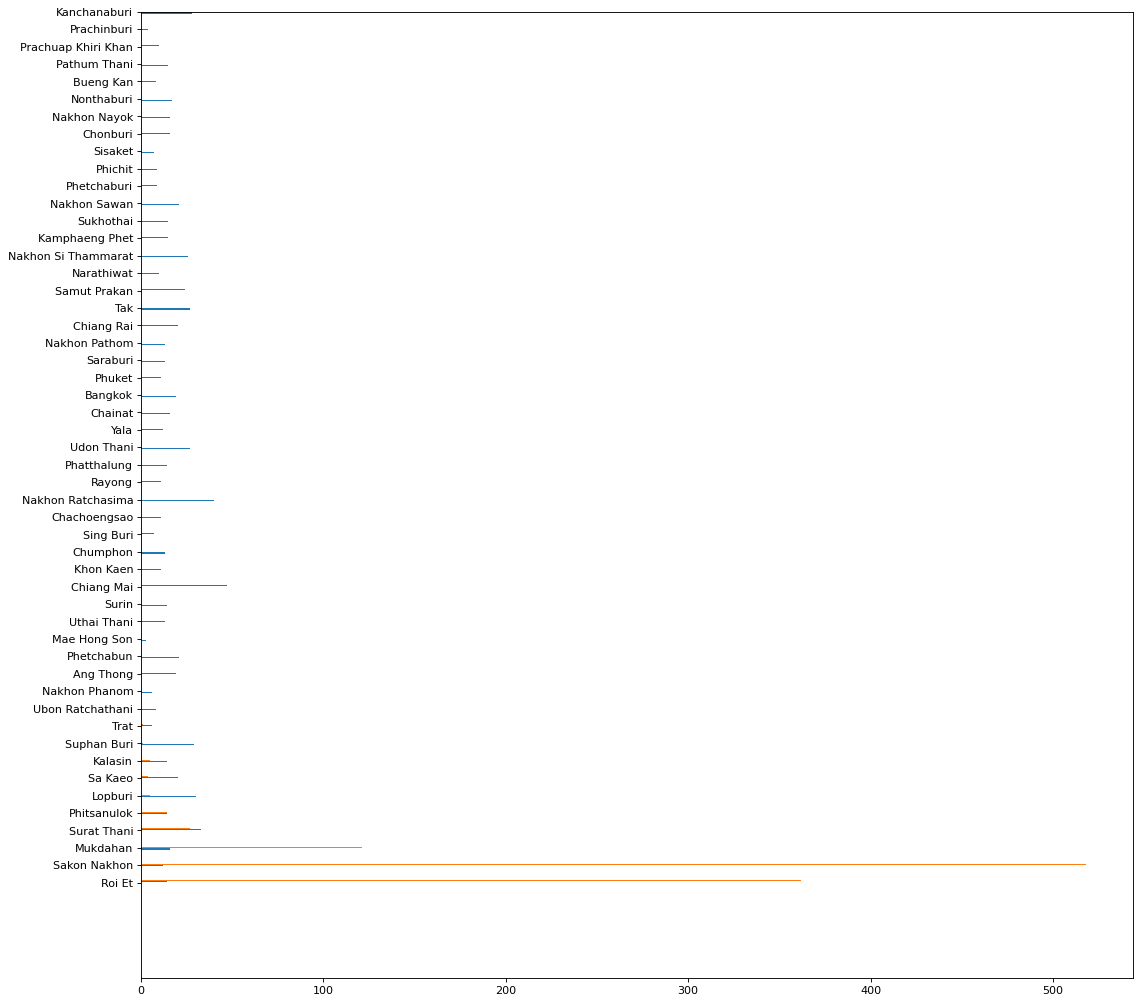

In [117]:
bins = np.linspace(0, 110.0, 700)
figure(figsize=(16, 16), dpi=80)
plt.hist(df[["province","num_injuries"]], bins, orientation='horizontal')
plt.ylim((None, 50))
plt.show

In [118]:
df1_num_acc = df['num_acc']
print(df1_num_acc)

0       1
1       1
2       1
3       3
4       1
       ..
1053    2
1054    1
1055    1
1056    1
1057    1
Name: num_acc, Length: 1058, dtype: int64


In [119]:
df1_num_acc = df['num_acc']
df1_num_injuries = df['num_injuries']
df1_num_acc_series = pd.Series(df1_num_acc)
df1_num_injuries_series = pd.Series(df1_num_injuries)


ทำการกำจัด Outlier

In [120]:

print("Highest df1_num_acc_series allowed",df1_num_acc_series.mean() + 3*df1_num_acc_series.std())
print("Lowest df1_num_acc_series allowed",df1_num_acc_series.mean() - 3*df1_num_acc_series.std())

print("Highest df1_num_injuries_series allowed",df1_num_injuries_series.mean() + 3*df1_num_injuries_series.std())
print("Lowest df1_num_injuries_series allowed",df1_num_injuries_series.mean() - 3*df1_num_injuries_series.std())

Highest df1_num_acc_series allowed 3.8433955975020058
Lowest df1_num_acc_series allowed -0.6486886031730834
Highest df1_num_injuries_series allowed 4.121886075601482
Lowest df1_num_injuries_series allowed -2.2353076256960005


In [121]:
df[(df1_num_acc_series> 3.8433955975020058) | (df1_num_acc_series < -0.6486886031730834)]
df = df[(df1_num_acc_series < 3.8433955975020058) & (df1_num_acc_series > -0.6486886031730834) & (df1_num_injuries_series < 4.121886075601482) & (df1_num_injuries_series > -2.2353076256960005)]

In [122]:
df1_num_acc = df['num_acc']
df1_num_injuries = df['num_injuries']
df1_num_acc_series = pd.Series(df1_num_acc)
df1_num_injuries_series = pd.Series(df1_num_injuries)

Plot Stem and Leave

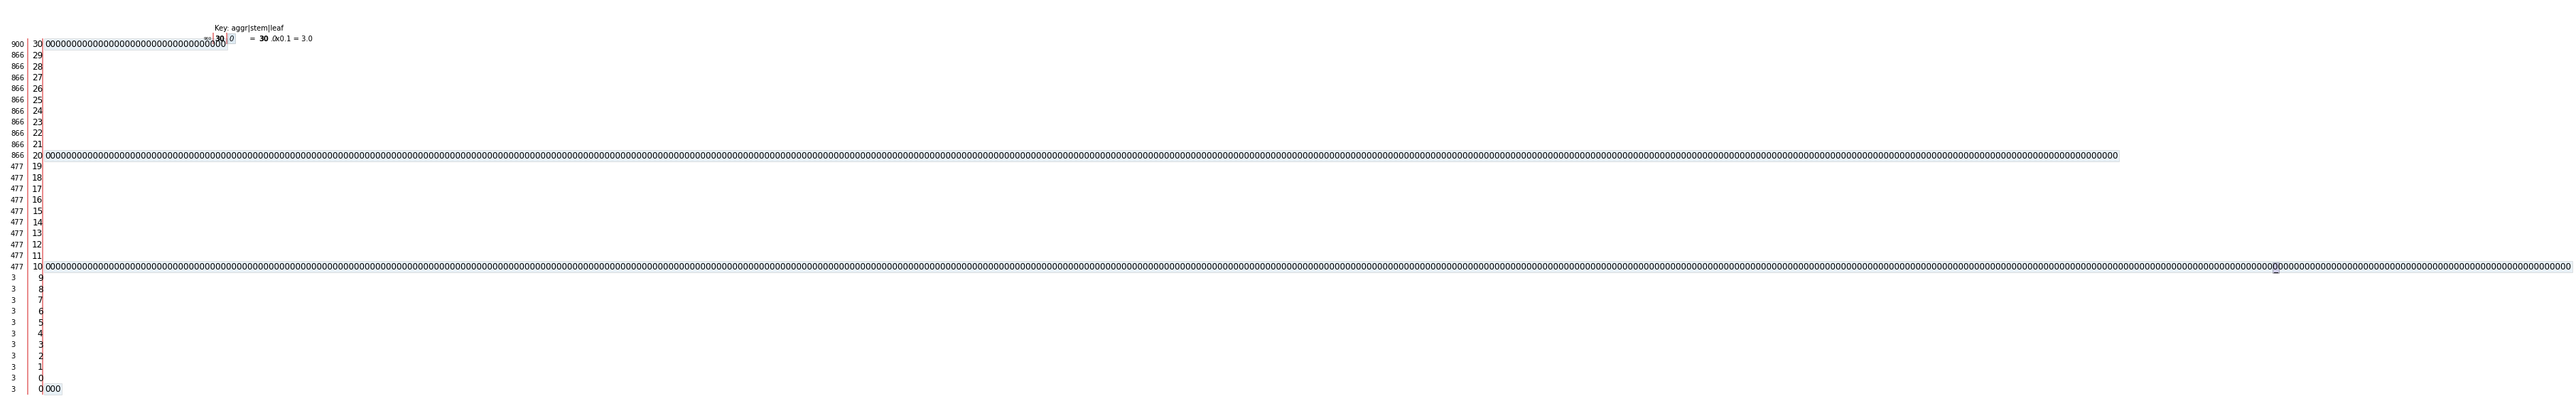

In [123]:
fig, ax = stemgraphic.stem_graphic(df1_num_acc_series)

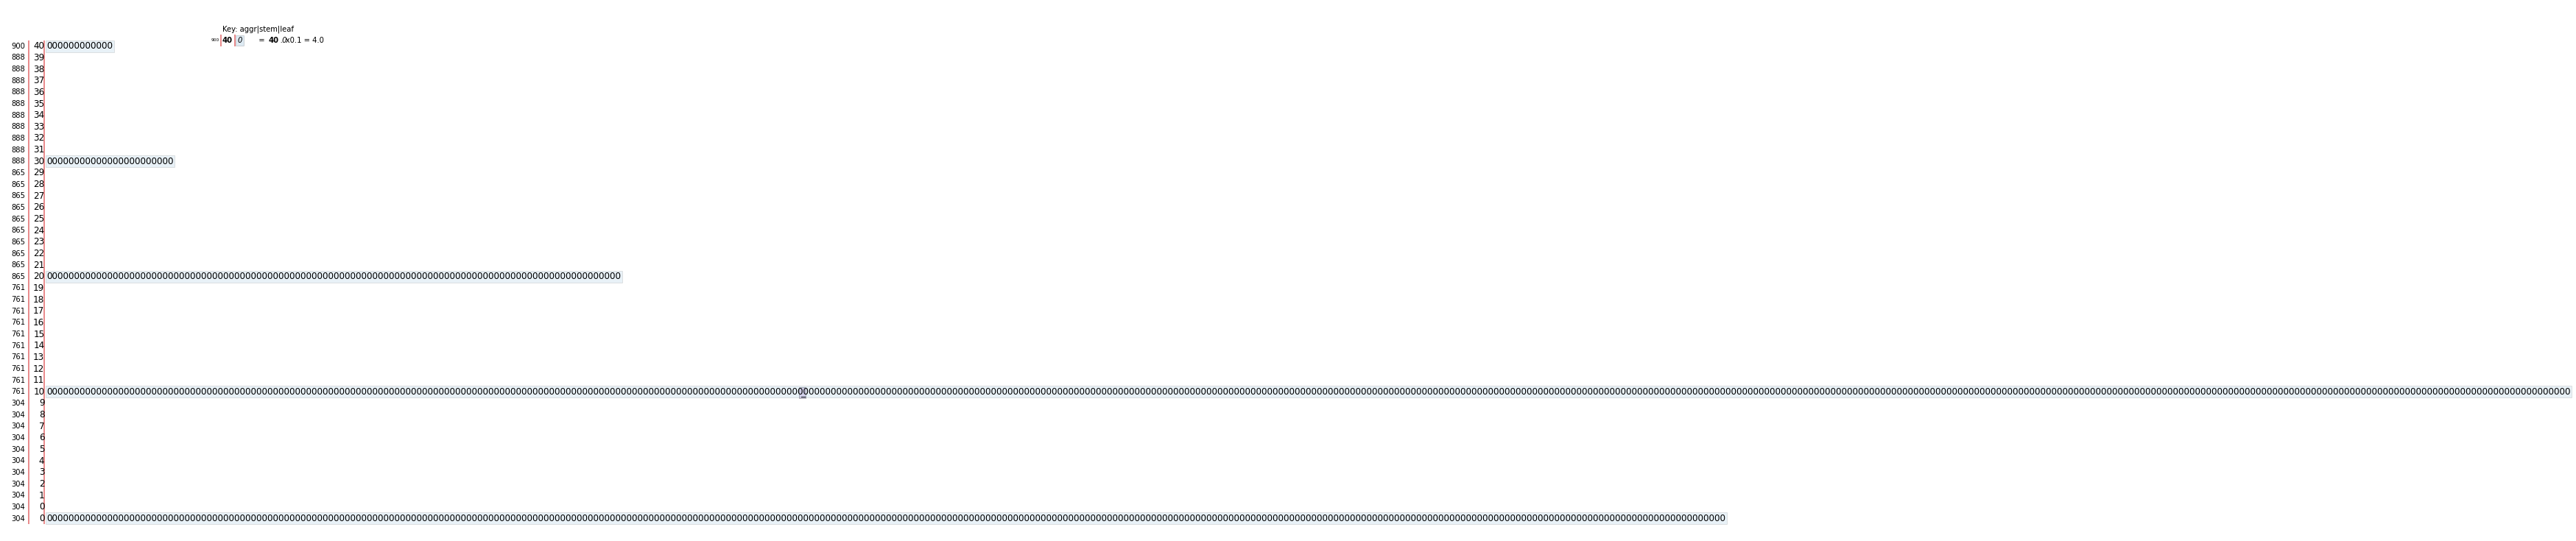

In [124]:

fig, ax = stemgraphic.stem_graphic(df1_num_injuries_series)

Plot Box Plot

Text(0.5, 0, 'Number of Injuried in Situation')

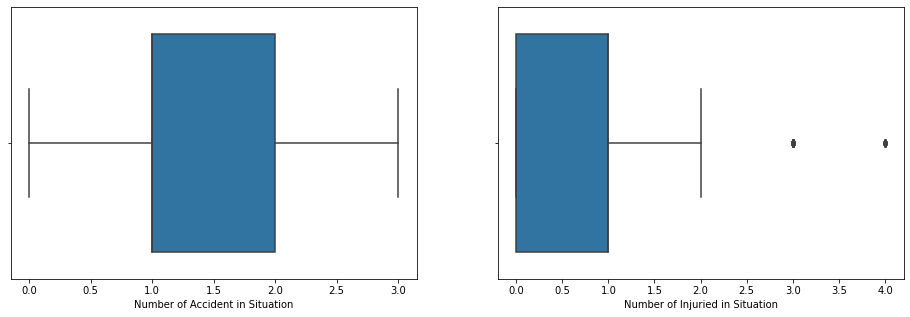

In [125]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(x=df1_num_acc)
plt.xlabel("Number of Accident in Situation")
plt.subplot(1,2,2)
sns.boxplot(x=df1_num_injuries)
plt.xlabel("Number of Injuried in Situation")

Plot Scatter Plot

<AxesSubplot:xlabel='num_acc', ylabel='num_injuries'>

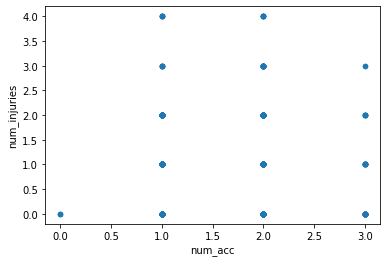

In [126]:
df.plot.scatter(x = 'num_acc', y = 'num_injuries')

Plot Probability Density Function

C:\Users\Sawid\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sawid\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Number of Injuried in Situation')

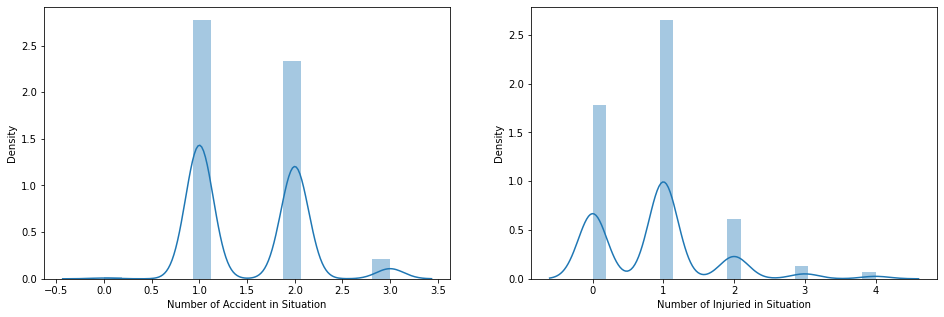

In [127]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(a=df1_num_acc)
plt.xlabel("Number of Accident in Situation")
plt.subplot(1,2,2)
sns.distplot(a=df1_num_injuries)
plt.xlabel("Number of Injuried in Situation")

Plot Cumulative Probability Function 

Text(0, 0.5, 'Number of Injuried in Situation')

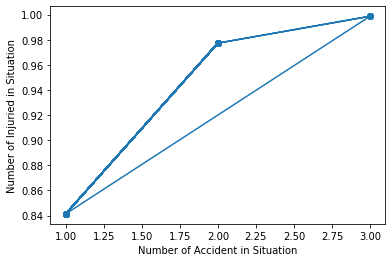

In [128]:
num = 100
row1 = df[["num_acc"]].sample(n = num)
x_axis_data = np.sort(row1)
row2 = df[["num_injuries"]].sample(n = num)
y_axis_data = scipy.stats.norm.cdf(x_axis_data)
plt.plot(x_axis_data, y_axis_data, marker='o')
plt.xlabel("Number of Accident in Situation")
plt.ylabel("Number of Injuried in Situation")